<a href="https://colab.research.google.com/github/wjtrump/1/blob/main/Assignment1-WANG%20Junwei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# INSTALL Tesseract OCR/pytesseract
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [3]:
import cv2
import pytesseract
img = cv2.imread('/content/maxresdefault.jpg')


The picture is copyed from news that the boris talking

In [4]:
# turn to gray
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [5]:
gray = get_grayscale(img)
thresh = thresholding(gray)
canny = canny(gray)

In [6]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

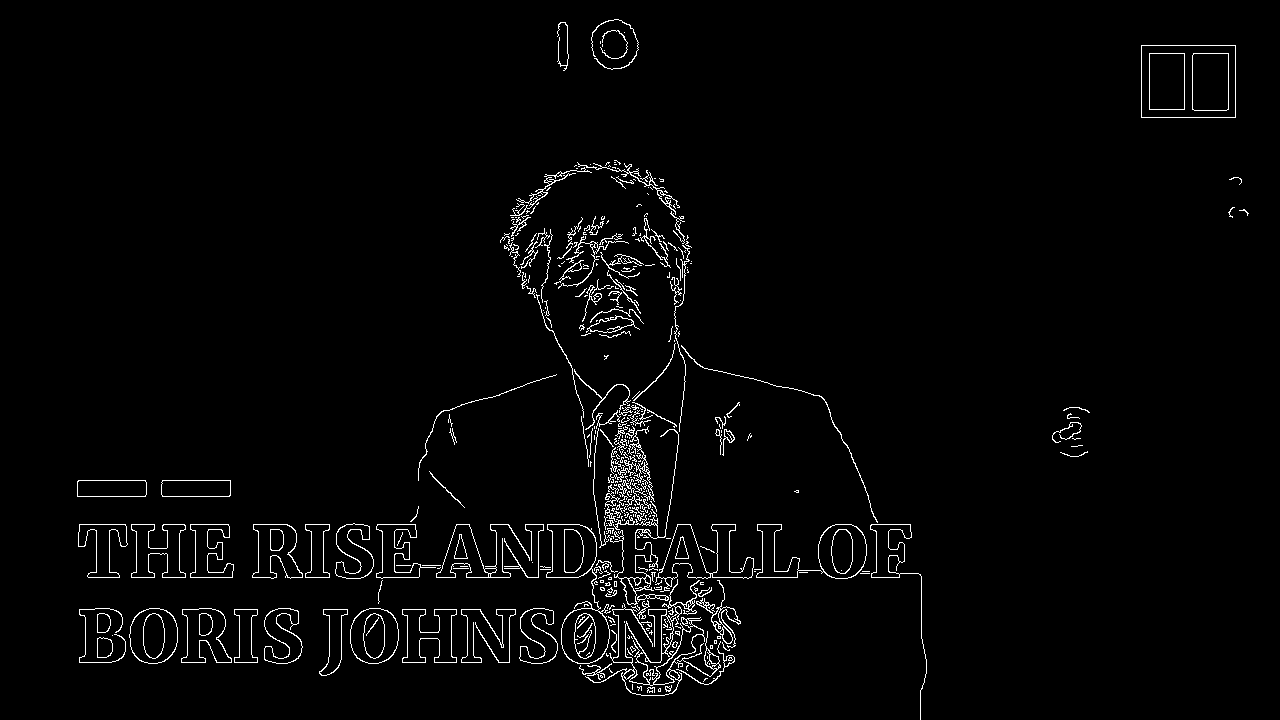

In [7]:
# show the canny edge
img = canny
cv2_imshow(img)

There are to many noise around the words"FALL OF".As the tier is so colorful and the national emblem is also infulenced the word identification.

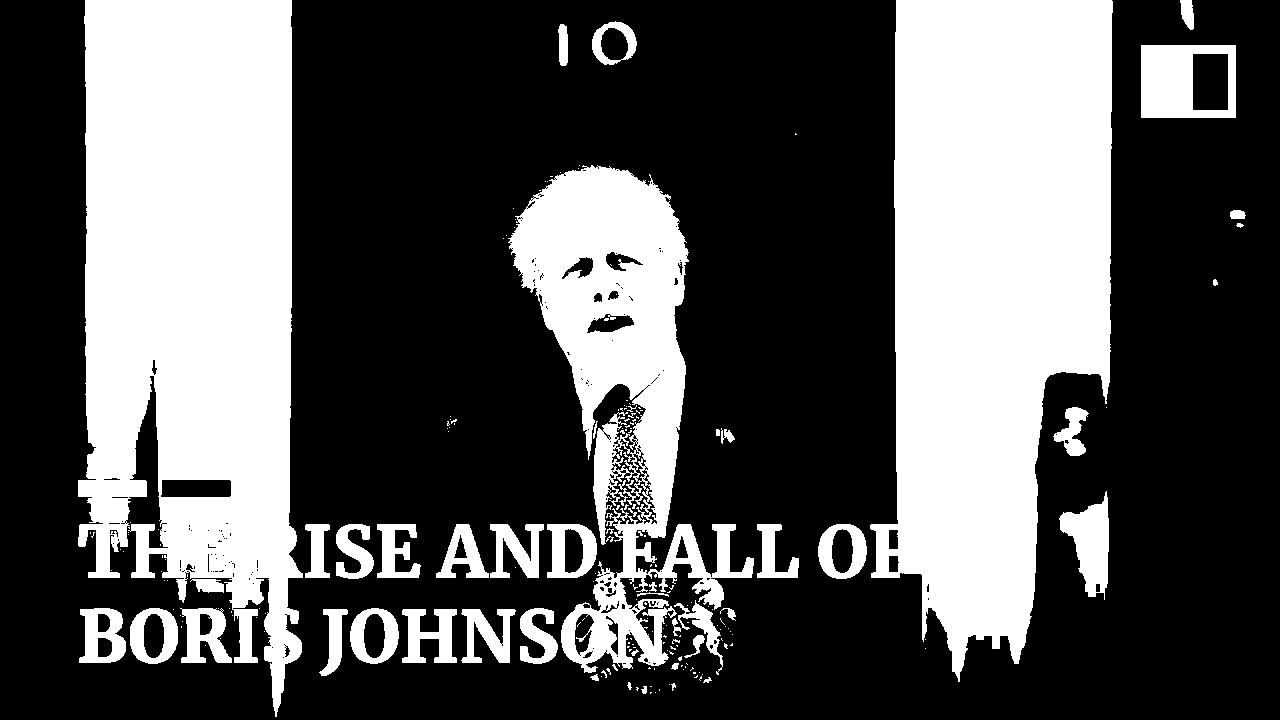

In [8]:
img = thresh
cv2_imshow(img)

In [19]:
# texting the words
from pytesseract import Output
img = cv2.imread('/content/maxresdefault.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [20]:
# output the outcome of the OCR
for i in range(len(d['text'])):
    if int(d['conf'][i]) > 60:
       print(d['text'][i])

   
   
THE
RISE
AND
BORIS


The OCR is not very correct some words are not indentified

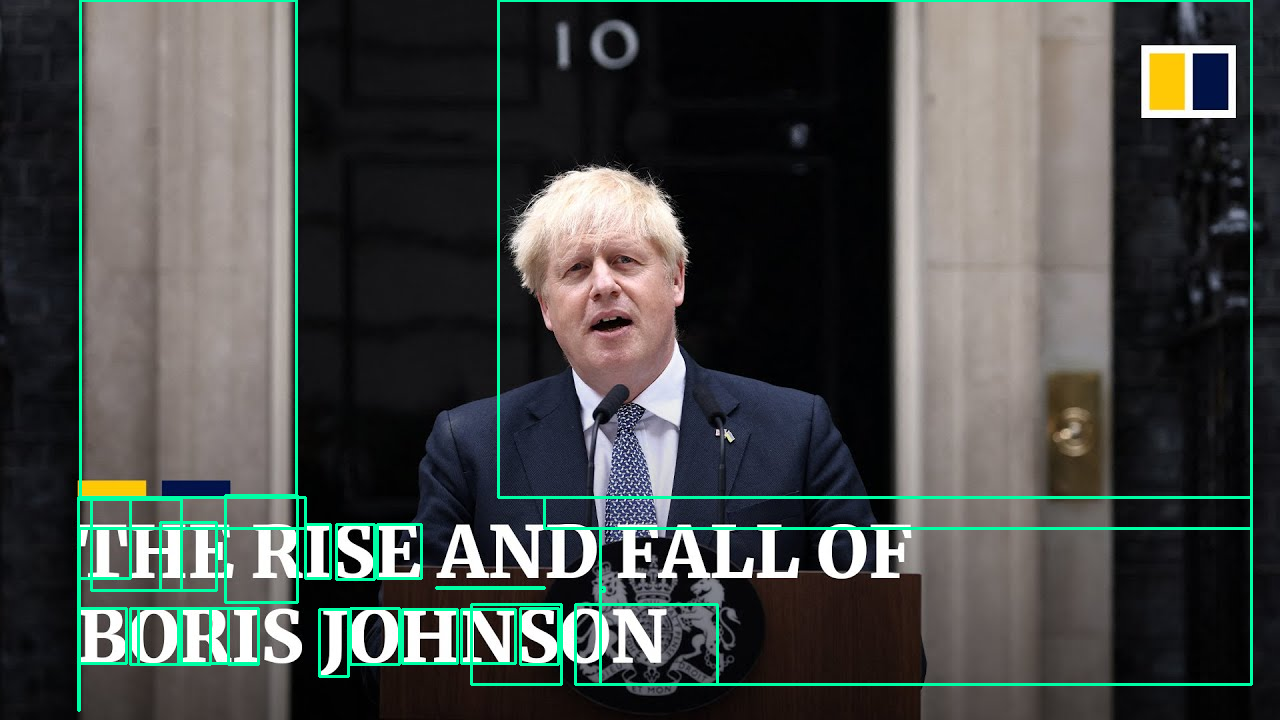

-1

In [23]:
#draw the Character Bounding Box
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (165, 255, 0), 2) #Because of the tesseract's origanl point is at the ledt bottom location,so it should do the invers caculate
cv2_imshow(img)
cv2.waitKey(0)

to many non-word were identified,so it should be cutted

In [10]:
# searching for the size of the picture to cut off
contours,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
x, y, w, h

(0, 0, 1280, 720)

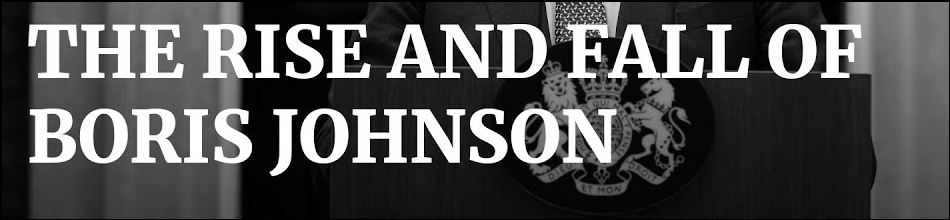

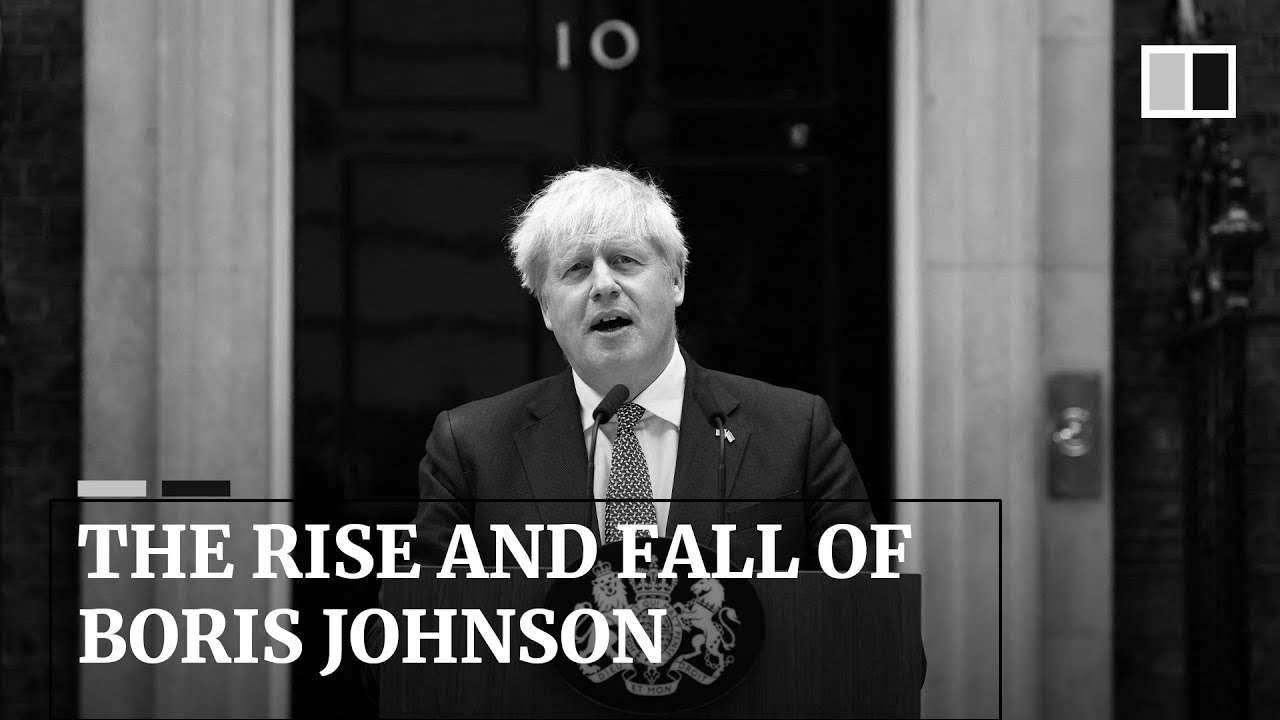

In [11]:
x1, y1 = 50, 500  # left top location
x2, y2 = 1000, 720  # right bottom location

# cut off the picture
cropped_image = gray[y1:y2,x1:x2]

# drawing the rectangle in the orignal picture to make sure get the right part
cv2.rectangle(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)
# show the result
cv2_imshow(cropped_image)
cv2_imshow(gray)

In [24]:
def read_text_from_image(image):
  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(image, 60, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))# Creating the Structuring Element

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)#Dilation Operation

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#get the location of the words

  image_copy = image.copy()
#Extracting Text
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()

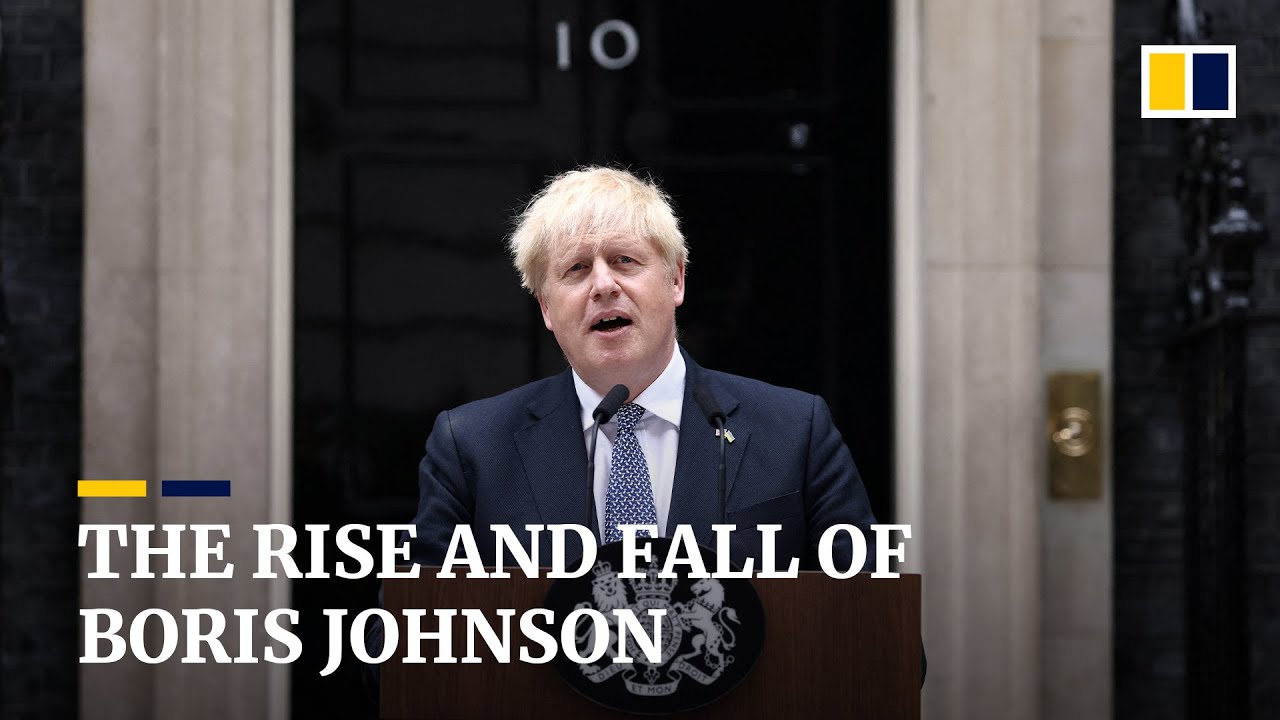



BORIS JOHNSON



THE RISE AND'FALL OF



 



BORIS JOHNSON



THE RISE AND'FALL OF



 



In [26]:
image = cv2.imread('/content/maxresdefault.jpg')
read_text_from_image(cropped_image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()